###Shanksův algoritmus **Baby-Steps Giant-Steps**
Řeší problém diskrétního logaritmu efektivnějším způsobem, než je postupné prohledávání všech kandidátů na exponenty. Představte si, že hledáte jeden konkrétní bod na kruhu, vytvořeném miliony bodů ve stejných vzdálenostech. Místo toho, abyste procházeli každý bod jeden po druhém, použijete strategii.

Základní myšlenka algoritmu spočívá v rozdělení velkého problému na dva menší podproblémy. Máme multiplikativní cyklickou grupu <code>Z<sub>p</sub>*</code>, kde všechny prvky leží na imaginární kružnici. Hledáme exponent `x` v rovnici <code>g<sup>x</sup> ≡ h (mod p)</code>.

Pomocí substituce, kdy hledaný exponent zapíšeme jako `x = im + j` a `m` je přibližně odmocnina z velikosti grupy <code>Z<sub>p</sub>*</code>, převedeme problém s potenciálně miliony kroků na dva seznamy, každý o velikosti zhruba druhé odmocnině velikosti grupy <code>Z<sub>p</sub>\*</code> v každém podproblému.

###Baby-Steps - malé kroky
V první fázi vytváříme seznam základních hodnot. Postupně vypočítáme mocniny generátoru `g` s malými exponenty: <code>g<sup>0</sup>, g<sup>1</sup>, g<sup>2</sup>, ... g<sup>m-1</sup></code>. Tyto hodnoty uložíme do tabulky spolu s odpovídajícími exponenty. Tento krok algoritmu lze přirovnat k vytvoření mapy orientačních bodů na kružnici.

###Giant-Steps - velké kroky
Ve druhé fázi děláme větší skoky po kružnici. Začneme u hledané hodnoty
`h` a postupně se posunujeme velkými kroky zpět pomocí výpočtu <code>h * g<sup>-im</sup> (mod p)</code>. Po každém kroku kontrolujeme, zda jsme nenarazili na některý z orientačních bodů z první fáze. Pokud najdeme shodu, můžeme snadno vypočítat hledaný exponent `x`.

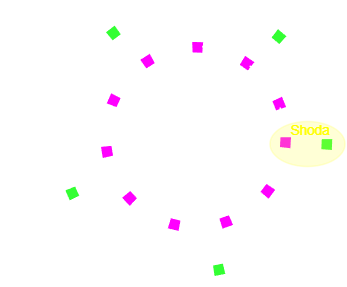


###Pseudokód algoritmu

1. Stanovení velikosti kroku: `m <- |√q|`
2. Inicializuj prázdnou tabulku `T`
3. Baby-Steps: Pro všechna `j`, kde `0 <= j < m`:
- Vypočti <code>g<sup>j</sup> (mod p)</code>,
- Ulož dvojici <code>(j, g<sub>j</sub>)</code> do tabulky `T`,
4. Příprava pro Giant-Steps:
- Vypočti inverzní prvek <code>c <- g<sup>-m</sup> (mod p)</code>,
- Nastav výchozí pozici gamma `γ <- h`,
5. Giant-Steps: Pro všechna `i`, kde `0 <= i < m`:
- Zjisti zda existuje `γ` v tabulce Baby-Steps s odpovídajícím indexem `j`,
- Pokud ano: Vrať hodnotu `x = im + j (mod q)`,
- Pokud ne: Proveď další velký krok,
6. Výsledek: Nalezený exponent `x` splňuje rovnici <code>g<sup>x</sup> ≡ h (mod p)</code>.

###Samostatný úkol: Nyní již znáte všechno potřebné, implementujte algoritmus Baby-Step Giant-Step.

In [ ]:
# PROSTOR PRO IMPLEMENTACI ALGORITMU BABY-STEPS GIANT-STEPS




### Možné řešení algoritmu Baby-Steps Giant-Steps a jeho vizualizace.

In [ ]:
# Algoritmus Sqaure and Multiply (S&M)
def square_and_multiply(base, exp, mod):
    result = 1
    base = base % mod

    while exp > 0:
        if exp % 2 == 1:
            result = (result * base) % mod
        base = (base * base) % mod
        exp //= 2

    return result

# Rozšířený Euklidův algoritmus
def inverse_element(a, m):
    def egcd(a, b):
        if b == 0:
            return a, 1, 0
        g, x1, y1 = egcd(b, a % b)
        x = y1
        y = x1 - (a // b) * y1
        return g, x, y

    g, x, _ = egcd(a, m)
    if g != 1:
        raise Exception("Inverzní prvek neexistuje, čísla jsou nesoudělná.")
    return x % m


def shanks_baby_step_giant_step(g, h, p):
    import math
    n = p - 1
    m = math.isqrt(n) + 1

    # BABY-STEPS
    baby_steps = []
    baby_dict = {}
    for j in range(m):
        val = square_and_multiply(g, j, p)
        baby_steps.append((val, j))
        baby_dict[val] = j

    # GIANT-STEPS
    g_inv = inverse_element(g, p)
    g_inv_m = square_and_multiply(g_inv, m, p)
    gamma = h
    giant_steps = []

    shoda_val = None
    for i in range(m):
        giant_steps.append((gamma, i))
        if gamma in baby_dict:
            j = baby_dict[gamma]
            shoda_val = gamma
            list_table(g, h, p, m, baby_steps, giant_steps, shoda_val)
            return i * m + j, i, j, m
        gamma = (gamma * g_inv_m) % p

In [ ]:
# Metoda zobrazující hodnoty uložené v seznamech kroků
def list_table(g, h, p, m, baby_steps, giant_steps, match_val):
    print("\n" + "=" * 65)
    print(f"{'BABY (g^j mod p)':<30} | {'GIANT (h * g^(-m*i) mod p)':<30} |")
    print("=" * 65)

    max_len = max(len(baby_steps), len(giant_steps))
    for k in range(max_len):
        baby_str = ""
        giant_str = ""
        detail_str = ""

        # BABY STEPS
        if k < len(baby_steps):
            b_val, b_j = baby_steps[k]
            baby_str = f"{b_j, b_val}"
            if b_val == match_val:
                baby_str += " <---"
        else:
            b_val, b_j = (None, None)

        # GIANT STEPS
        if k < len(giant_steps):
            g_val, g_i = giant_steps[k]
            giant_str = f"{g_i, g_val}"
            if g_val == match_val:
                giant_str += " <---"
        else:
            g_val, g_i = (None, None)

        print(f"{baby_str:<30} | {giant_str:<30} |")

    print("=" * 65 + "\n")


# Praktický příklad
g = 17
h = 438
p = 509

x, i, j, m = shanks_baby_step_giant_step(g, h, p)
exponent = i * m + j
print(f"Nalezeno: i = {i}, j = {j} \nx = {i} * {m} + {j} = {exponent} -> {g}^{exponent} ≡ {h} (mod {p})\nx = {x}")

### Realné dopady prolomení diskrétního logaritmu.

V praxi prolomení DLP vede k okamžité ztrátě dvou pilířů CIA triády a vytváří kritické dopady v oblastech:
- **Webové komunikace** - útoky mužem uprostřed kompromitací protokolů TLS/HTTPS,
- **Digitální identity** - masové falšování digitálních podpisových schémat (software, dokumentů a identit),
- **E-mailové bezpečnosti** - čitelnost obsahu zpráv bez možnosti ověření odesílatele,
- **Infrastruktury** - zneplatnění mechanizmů autentizace (SSH, VPN) a zabezpečení.

\
Například: **Logjam: TLS vulnerabilities (CVE-2015-4000)**

Útočník, v postavení muže uprostřed (man-in-the-middle) zneužil zranitelnost protokolů TLS 1.2 a starších. Přepisem zpráv pro vyjednávání šifrovacích sad spojení (handshake) zasílaných na server vynutil zranitelnou úroveň zabezpečení protokolu Diffie-Hellman (downgrade) bez odhalení.

Jednorázovým předvýpočtem hodnoty `p` konkrétní 512 bitové multiplikativní grupy <code>Z<sub>p</sub>*</code> oslabených parametrů útočník získal řešení konkrétního problému diskrétního logaritmu. V řádech desítek sekund až minuty tento proces umožňoval získat sdílené tajemství a rekonstruovat klíče relace spojení. Dále dešifrovat komunikaci, nebo v reálném čase manipulovat s přenášenými daty.

Další zdroje ke zranitelnosti Logjam:
- NIST National Vulnerability Database (NVD). _CVE-2015-4000 Detail_. Online. Dostupné z: https://nvd.nist.gov/vuln/detail/cve-2015-4000.
- Red Hat Customer Portal. _Logjam: TLS vulnerabilities (CVE-2015-4000)._ Online. Dostupné z: https://access.redhat.com/articles/1456263.
